# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [3]:
data=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [118]:
data.shape

(3999, 11)

In [5]:
data.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

# Duplicate Columns

In [6]:
data[data.duplicated(keep=False)]

Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []

# NULL VALUES

In [7]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# Rename the Column Name

In [8]:
data=data.rename({"Award?":"award"},axis=1)
data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 12 columns]

# Convert the Column names to Lower Case

In [9]:
cols=data.columns.str.lower()
data.columns=cols
data

id#  balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 12 columns]

# Drop the id Column

In [11]:
data=data.drop(columns="id#")
data

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 11 columns]

# Visualizations

# Numerical Columns

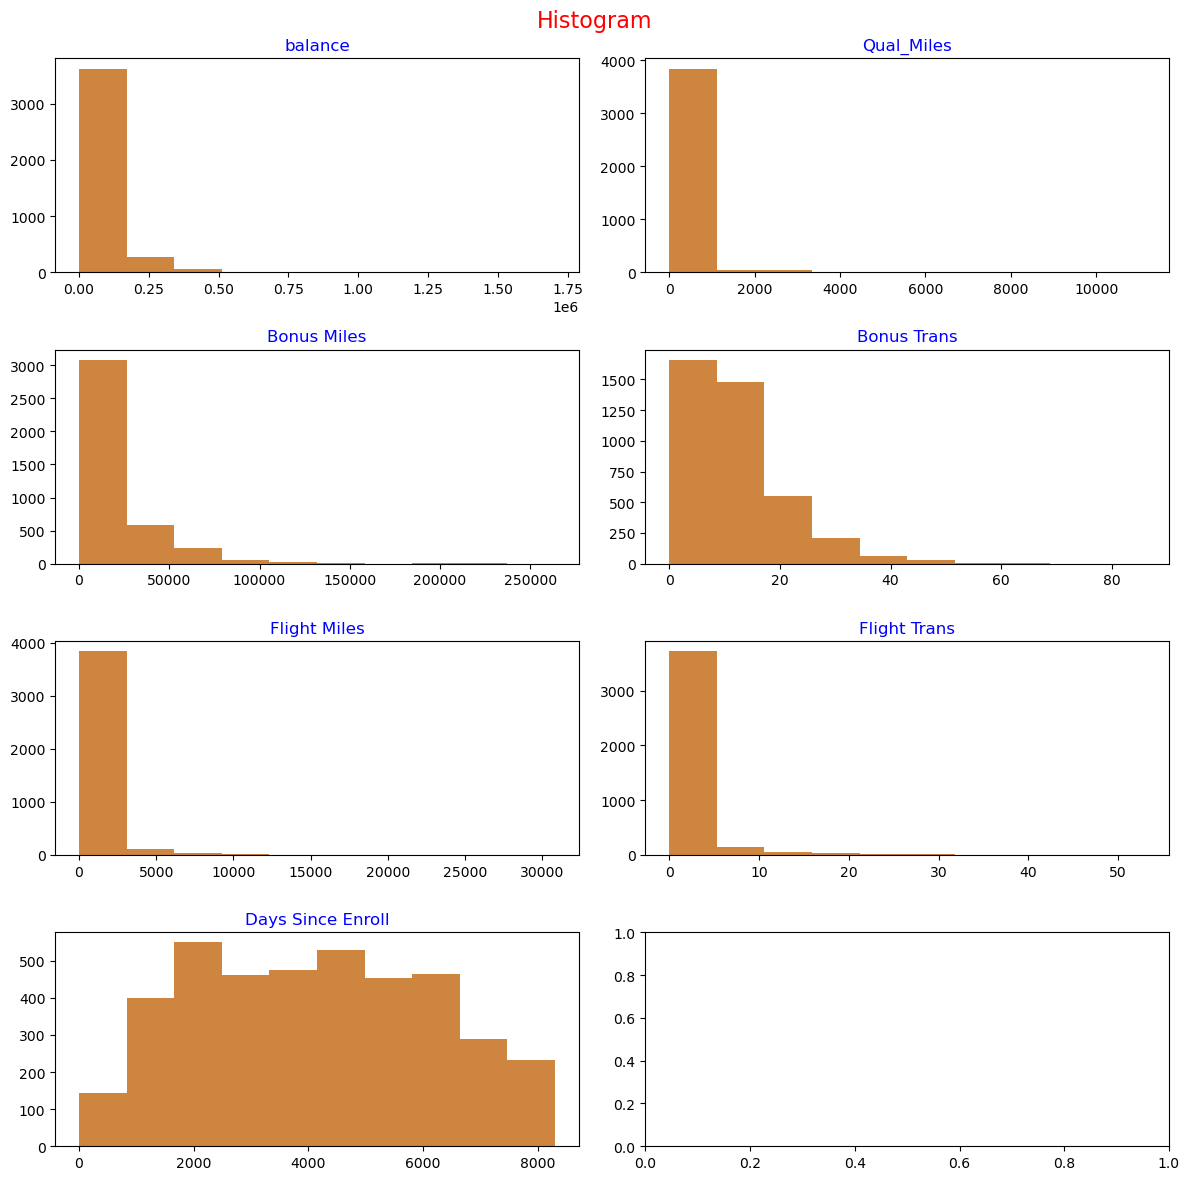

In [14]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(12,12))
plt.suptitle("Histogram",color="red",size=16)
ax[0,0].set_title("balance",color="blue")
ax[0,0].hist(data.balance,color="peru")
ax[0,1].set_title("Qual_Miles",color="blue")
ax[0,1].hist(data.qual_miles,color="peru")
ax[1,0].set_title("Bonus Miles",color="blue")
ax[1,0].hist(data.bonus_miles,color="peru")
ax[1,1].set_title("Bonus Trans",color="blue")
ax[1,1].hist(data.bonus_trans,color="peru")
ax[2,0].set_title("Flight Miles",color="blue")
ax[2,0].hist(data.flight_miles_12mo,color="peru")
ax[2,1].set_title("Flight Trans",color="blue")
ax[2,1].hist(data.flight_trans_12,color="peru")
ax[3,0].set_title("Days Since Enroll",color="blue")
ax[3,0].hist(data.days_since_enroll,color="peru")
plt.tight_layout()
plt.show()

# Categorical Column

award
0    2518
1    1481
Name: count, dtype: int64

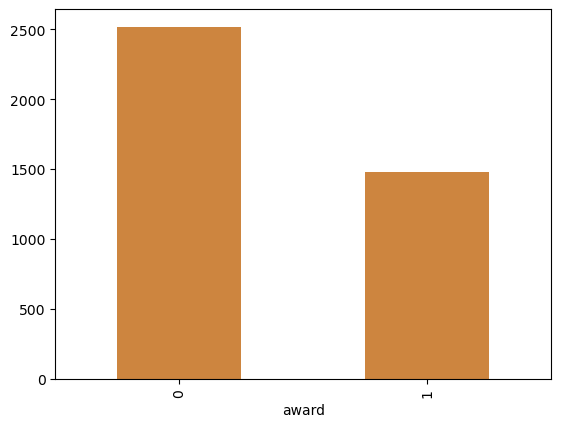

In [121]:
data["award"].value_counts().plot(kind="bar",color="peru")
data["award"].value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

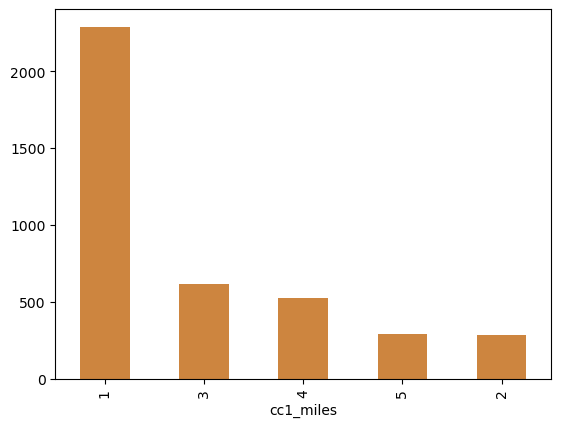

In [122]:
data["cc1_miles"].value_counts().plot(kind="bar",color="peru")
data["cc1_miles"].value_counts()

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

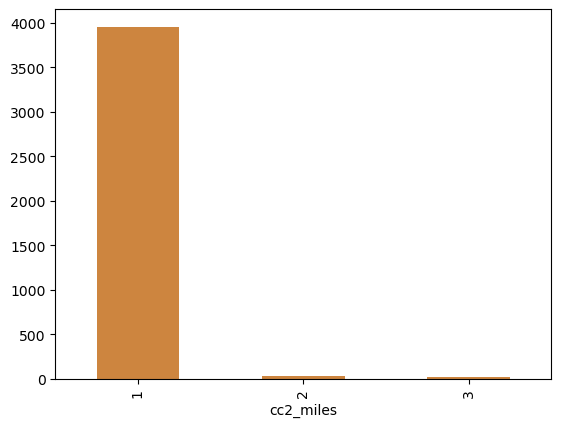

In [123]:
data["cc2_miles"].value_counts().plot(kind="bar",color="peru")
data["cc2_miles"].value_counts()

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

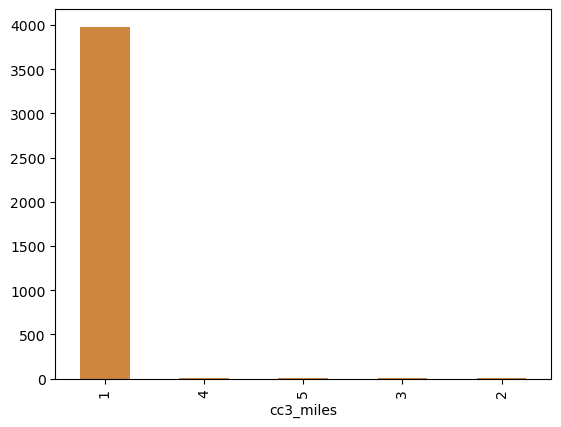

In [124]:
data["cc3_miles"].value_counts().plot(kind="bar",color="peru")
data["cc3_miles"].value_counts()

In [19]:
corr=data.corr()
corr

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  \
balance            1.000000    0.108722   0.338344  -0.008804   0.035243   
qual_miles         0.108722    1.000000   0.007931  -0.013923  -0.007779   
cc1_miles          0.338344    0.007931   1.000000  -0.068223   0.060555   
cc2_miles         -0.008804   -0.013923  -0.068223   1.000000  -0.006166   
cc3_miles          0.035243   -0.007779   0.060555  -0.006166   1.000000   
bonus_miles        0.403487    0.031021   0.825200  -0.003969   0.204134   
bonus_trans        0.324935    0.050725   0.608943   0.064399   0.097313   
flight_miles_12mo  0.217551    0.126774   0.037370   0.010598  -0.001777   
flight_trans_12    0.255700    0.144004   0.041333   0.028284  -0.001117   
days_since_enroll  0.263129    0.017312   0.230849  -0.005807   0.010832   
award              0.178494    0.095256   0.335457   0.005332   0.023484   

                   bonus_miles  bonus_trans  flight_miles_12mo  \
balance               0.403487     0.324935           0.217551   
qual_miles            0.031021     0.050725           0.126774   
cc1_miles             0.825200     0.608943           0.037370   
cc2_miles            -0.003969     0.064399           0.010598   
cc3_miles             0.204134     0.097313          -0.001777   
bonus_miles           1.000000     0.603180           0.183536   
bonus_trans           0.603180     1.000000           0.377216   
flight_miles_12mo     0.183536     0.377216           1.000000   
flight_trans_12       0.185261     0.432364           0.869193   
days_since_enroll     0.210397     0.161262           0.037271   
award                 0.373506     0.333893           0.217715   

                   flight_trans_12  days_since_enroll     award  
balance                   0.255700           0.263129  0.178494  
qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284          -0.005807  0.005332  
cc3_miles                -0.001117           0.010832  0.023484  
bonus_miles               0.185261           0.210397  0.373506  
bonus_trans               0.432364           0.161262  0.333893  
flight_miles_12mo         0.869193           0.037271  0.217715  
flight_trans_12           1.000000           0.059260  0.247909  
days_since_enroll         0.059260           1.000000  0.188121  
award                     0.247909           0.188121  1.000000

# Scatter Plot

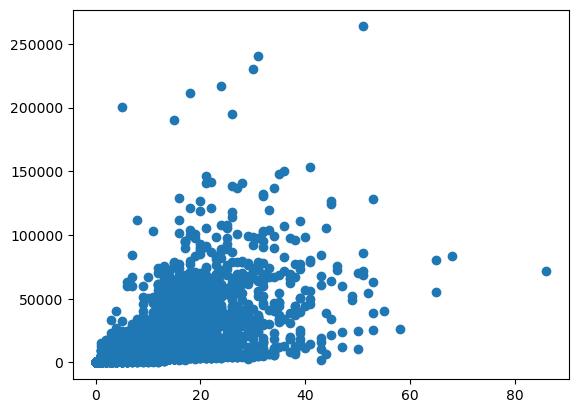

In [21]:
plt.scatter(data.bonus_trans,data.bonus_miles)

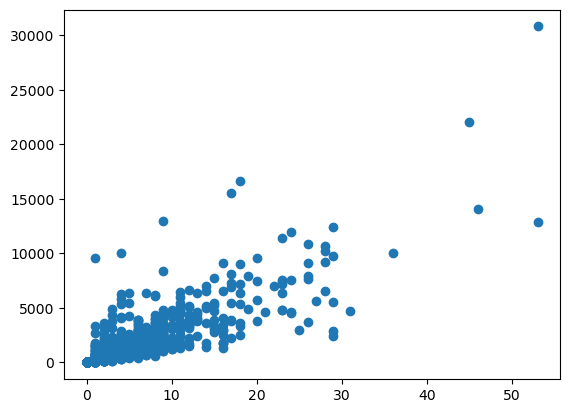

In [22]:
plt.scatter(data.flight_trans_12,data.flight_miles_12mo)

# Standardize the data

In [24]:
def standard(i):
    z=(i-i.mean())/i.std()
    return z

In [25]:
std_data=standard(data)
std_data

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0    -0.451084   -0.186275  -0.769482   -0.09823  -0.062759    -0.702698   
1    -0.539389   -0.186275  -0.769482   -0.09823  -0.062759    -0.701001   
2    -0.319991   -0.186275  -0.769482   -0.09823  -0.062759    -0.539185   
3    -0.583726   -0.186275  -0.769482   -0.09823  -0.062759    -0.689200   
4     0.239648   -0.186275   1.409295   -0.09823  -0.062759     1.082986   
...        ...         ...        ...        ...        ...          ...   
3994 -0.547010   -0.186275  -0.769482   -0.09823  -0.062759    -0.356915   
3995 -0.091454   -0.186275  -0.769482   -0.09823  -0.062759    -0.669284   
3996 -0.000043   -0.186275   0.683036   -0.09823  -0.062759     0.343761   
3997 -0.185584   -0.186275  -0.769482   -0.09823  -0.062759    -0.689200   
3998 -0.700420   -0.186275  -0.769482   -0.09823  -0.062759    -0.709903   

      bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  \
0       -1.103926          -0.328562        -0.362123           1.395280   
1       -0.999801          -0.328562        -0.362123           1.379784   
2       -0.791550          -0.328562        -0.362123           1.411744   
3       -1.103926          -0.328562        -0.362123           1.372037   
4        1.499207           1.154788         0.692404           1.363805   
...           ...                ...              ...                ...   
3994    -0.791550          -0.185726        -0.098491          -1.314955   
3995    -0.687425          -0.328562        -0.362123          -1.318829   
3996    -0.375049          -0.328562        -0.362123          -1.315439   
3997    -1.103926           0.028527        -0.098491          -1.315924   
3998    -1.208052          -0.328562        -0.362123          -1.317376   

         award  
0    -0.766823  
1    -0.766823  
2    -0.766823  
3    -0.766823  
4     1.303755  
...        ...  
3994  1.303755  
3995  1.303755  
3996  1.303755  
3997 -0.766823  
3998 -0.766823  

[3999 rows x 11 columns]

# Hierarchy Cluster

In [27]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

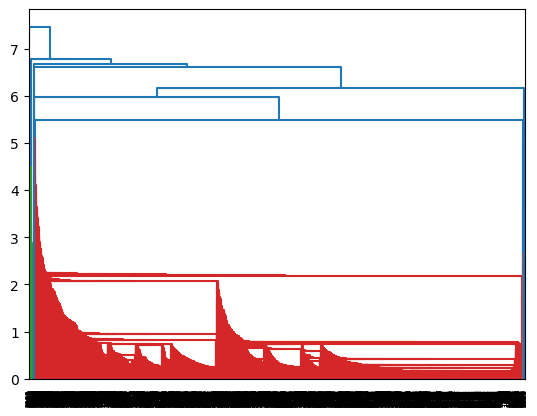

In [28]:
matrix_single=sch.linkage(std_data,metric="euclidean",method="single")
dendrogram_single=sch.dendrogram(matrix_single)

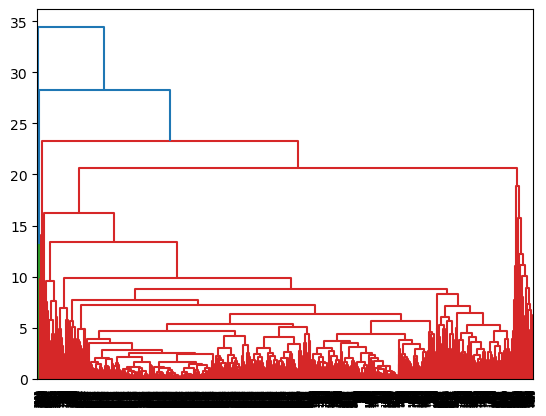

In [29]:
matrix_complete=sch.linkage(std_data,metric="euclidean",method="complete")
dendrogram_complete=sch.dendrogram(matrix_complete)

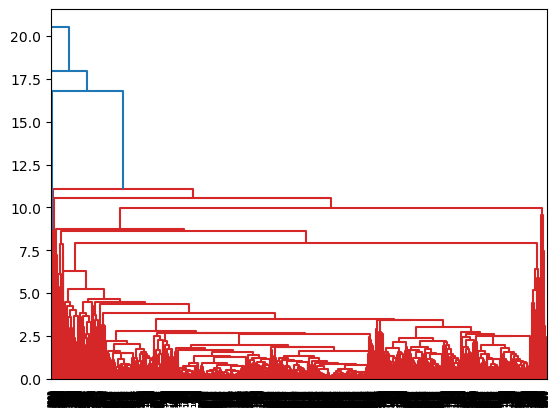

In [30]:
matrix_average=sch.linkage(std_data,metric="euclidean",method="average")
dendrogram_average=sch.dendrogram(matrix_average)

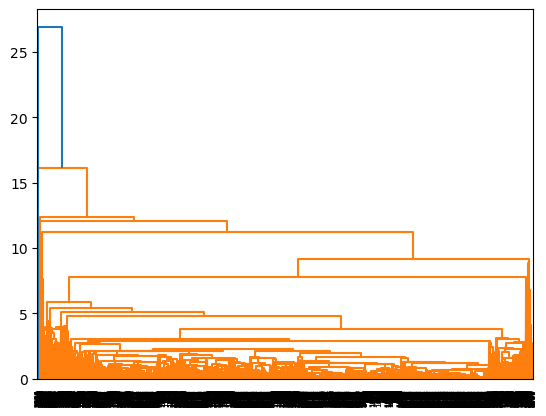

In [31]:
matrix_centroid=sch.linkage(std_data,metric="euclidean",method="centroid")
dendrogram_centroid=sch.dendrogram(matrix_centroid)

In [125]:
hc_single=AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="single")
hc_single.fit(std_data)
labels=pd.Series(hc_single.labels_)
print(labels.value_counts())

0    3983
2      15
1       1
Name: count, dtype: int64


In [126]:
hc_complete=AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="complete")
hc_complete.fit(std_data)
labels=pd.Series(hc_complete.labels_)
print(labels.value_counts())

0    3980
2      15
1       4
Name: count, dtype: int64


In [127]:
hc_average=AgglomerativeClustering(n_clusters=4,metric="euclidean",linkage="average")
hc_average.fit(std_data)
labels=pd.Series(hc_average.labels_)
print(labels.value_counts())

1    3979
3      15
0       4
2       1
Name: count, dtype: int64


In [35]:
hc_centroid=AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="ward")
hc_centroid.fit(std_data)
labels=pd.Series(hc_centroid.labels_)
print(labels.value_counts())

0    2489
1    1380
2     130
Name: count, dtype: int64


# Among the all the linkage centroid giving equal no of data pts in clusters

In [37]:
for i in range(3,6):
    hc=AgglomerativeClustering(n_clusters=i,metric="euclidean",linkage="ward")
    hc.fit(std_data)
    labels=pd.Series(hc.labels_)
    print("No Of Clusters:",i)
    print(labels.value_counts())

No Of Clusters: 3
0    2489
1    1380
2     130
Name: count, dtype: int64
No Of Clusters: 4
1    2446
0    1380
2     130
3      43
Name: count, dtype: int64
No Of Clusters: 5
1    2446
0    1362
2     130
3      43
4      18
Name: count, dtype: int64


# from 3,4,5 clusters 4 clusters are divided the data better.

# Build with n_clusters = 3

In [40]:
hc=AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="ward")
hc.fit(std_data)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [41]:
labels_hc=hc.labels_
labels_hc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# Adding labels

In [43]:
data_hc=data.copy()
data_hc["labels"]=hc.labels_
data_hc

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      award  labels  
0         0       0  
1         0       0  
2         0       0  
3         0       0  
4         1       1  
...     ...     ...  
3994      1       0  
3995      1       0  
3996      1       1  
3997      0       0  
3998      0       0  

[3999 rows x 12 columns]

In [44]:
data_hc["labels"].value_counts()

labels
0    2489
1    1380
2     130
Name: count, dtype: int64

In [45]:
data_hc.groupby("labels").mean()

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  \
labels                                                               
0        46718.863399    9.274407   1.242266   1.023303   1.000000   
1       116314.450725  363.839130   3.498551   1.000000   1.035507   
2       134880.892308  393.323077   2.430769   1.000000   1.000000   

         bonus_miles  bonus_trans  flight_miles_12mo  flight_trans_12  \
labels                                                                  
0        5037.792688     7.091201         221.167135         0.700281   
1       37150.356522    18.066667         377.000000         1.150000   
2       36582.169231    29.338462        5915.523077        16.638462   

        days_since_enroll     award  
labels                               
0             3772.785858  0.188027  
1             4696.888406  0.663043  
2             4599.607692  0.753846

# Balance with avg 46000 belongs to cluster 0
# Most of them are belongs to cluster 0
# Members with Less flight-miles and flight-transactions are belongs to cluster 1
# Next highest members are belongs to cluster 1
# Very few of them with more flight-miles and flight-transactions are belongs to cluster 2
# Less members are belongs to cluster 2

In [47]:
ss_hc=silhouette_score(std_data,labels_hc)
ss_hc

0.2940432062008628

# KMEANS

In [48]:
from sklearn.cluster import KMeans

# Different K values

In [135]:
k_values=list(range(2,11))

In [136]:
inertia=[]
for i in k_values:
    kmeans=KMeans(n_clusters=i,n_init="auto")
    kmeans.fit(std_data)
    inertia.append(kmeans.inertia_)

pd.DataFrame({"K_value":k_values,"inertia":inertia})

K_value       inertia
0        2  35400.702435
1        3  30897.893893
2        4  28582.051253
3        5  24879.521937
4        6  23333.473042
5        7  20710.575589
6        8  20715.810106
7        9  16060.663605
8       10  15178.527406

# Scree Plot/Elbow Plot

Text(0.5, 1.0, 'Elbow Graph/Scree Plot')

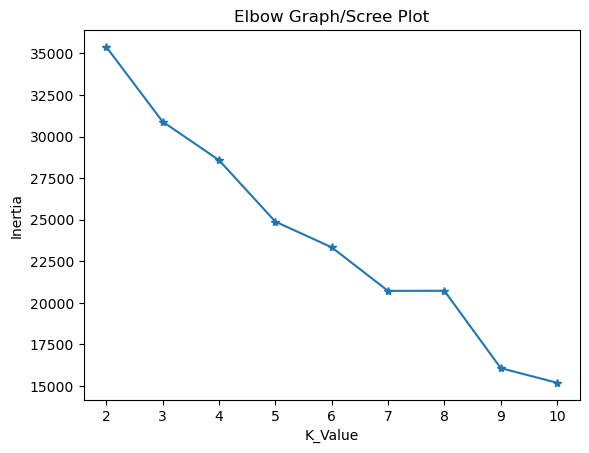

In [137]:
plt.plot(k_values,inertia,marker="*")
plt.xlabel("K_Value")
plt.ylabel("Inertia")
plt.title("Elbow Graph/Scree Plot")

In [138]:
kmeans=KMeans(n_clusters=3,n_init="auto")
kmeans.fit(std_data)


KMeans(n_clusters=3, n_init='auto')

In [139]:
labels_kmeans=kmeans.labels_
labels_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [140]:
data_kmeans=data.copy()
data_kmeans["labels"]=labels_kmeans
data_kmeans

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      award  labels  
0         0       0  
1         0       0  
2         0       0  
3         0       0  
4         1       2  
...     ...     ...  
3994      1       1  
3995      1       1  
3996      1       1  
3997      0       1  
3998      0       1  

[3999 rows x 12 columns]

In [141]:
data_kmeans["labels"].value_counts()

labels
1    1555
0    1428
2    1016
Name: count, dtype: int64

In [142]:
data_kmeans.groupby("labels").mean()

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  \
labels                                                               
0        62926.905462   78.066527   1.680672   1.024510   1.000700   
1        35781.562058  107.929904   1.261093   1.009646   1.000000   
2       146487.951772  292.326772   3.813976   1.007874   1.047244   

         bonus_miles  bonus_trans  flight_miles_12mo  flight_trans_12  \
labels                                                                  
0        8936.354342     9.904762         224.026611         0.708683   
1        4853.327331     6.645016         214.953698         0.604502   
2       47494.293307    21.573819        1166.929134         3.485236   

        days_since_enroll     award  
labels                               
0             5606.065826  0.373950  
1             2297.902251  0.131190  
2             4814.388780  0.731299

# Balance with avg 45000 and bonus-miles with avg 4800 and bonus-trans with avg 7 belongs to cluster 0
# Most of them are belongs to cluster 0
# Members with More flight-miles and flight-transactions and qual-miles are belongs to cluster 1
# Next highest members are belongs to cluster 1
# Very few of them balance with avg 1,17,000 and highest cc1-miles are belongs to cluster 2
# Less members are belongs to cluster 2

In [57]:
ss_kmeans=silhouette_score(std_data,labels_kmeans)
ss_kmeans

0.30930665971915194

# DBSCAN Clustering

In [59]:
from sklearn.cluster import DBSCAN

# Different epsilon and min_samples

In [143]:
ep=[0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
samples=[8,9,10,11,12,13,14,15,16,17,18]

In [144]:
for i in ep:
    for j in samples:
        dbscan=DBSCAN(eps=i,min_samples=j)
        dbscan.fit(std_data)
        labels=pd.Series(dbscan.labels_)
        print("eps:",i,"and min pts:",j)
        print(labels.value_counts())
        print(silhouette_score(std_data,labels).max())

eps: 0.8 and min pts: 8
 0    2204
 1     923
-1     862
 2      10
Name: count, dtype: int64
0.197310419641436
eps: 0.8 and min pts: 9
 0    2194
 1     915
-1     890
Name: count, dtype: int64
0.19708767674407043
eps: 0.8 and min pts: 10
 0    2183
-1     912
 1     896
 2       8
Name: count, dtype: int64
0.12943204116674445
eps: 0.8 and min pts: 11
 0    2142
-1     943
 1     887
 3      15
 2      12
Name: count, dtype: int64
0.13136744820870613
eps: 0.8 and min pts: 12
 0    2133
-1     966
 1     821
 2      53
 4      14
 3      12
Name: count, dtype: int64
0.10910732960976183
eps: 0.8 and min pts: 13
 0    2129
-1     980
 1     815
 2      51
 3      12
 4      12
Name: count, dtype: int64
0.10611970713499329
eps: 0.8 and min pts: 14
 0    2121
-1    1018
 1     810
 2      50
Name: count, dtype: int64
0.13092121534887974
eps: 0.8 and min pts: 15
 0    2117
-1    1036
 1     801
 2      45
Name: count, dtype: int64
0.12672525103524945
eps: 0.8 and min pts: 16
 0    2111
-1  

# Among 1.7 ,16

In [145]:
dbscan=DBSCAN(eps=1.7,min_samples=16)
dbscan.fit(std_data)


DBSCAN(eps=1.7, min_samples=16)

In [146]:
labels_dbscan=pd.Series(dbscan.labels_)
labels_dbscan

0       0
1       0
2       0
3       0
4       1
       ..
3994    1
3995    1
3996    1
3997    0
3998    0
Length: 3999, dtype: int64

In [147]:
data_dbscan=data.copy()
data_dbscan["labels"]=labels_dbscan
data_dbscan

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      award  labels  
0         0       0  
1         0       0  
2         0       0  
3         0       0  
4         1       1  
...     ...     ...  
3994      1       1  
3995      1       1  
3996      1       1  
3997      0       0  
3998      0       0  

[3999 rows x 12 columns]

In [148]:
data_dbscan[data_dbscan.labels==0]

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
5       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
3991    39142           0          3          1          1        14981   
3992    11181           0          1          1          1          929   
3993     3974           0          1          1          1          365   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
5               0                  0                0               6942   
...           ...                ...              ...                ...   
3991           28                  0                0               1408   
3992           12                  0                0               1407   
3993            3                  0                0               1397   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      award  labels  
0         0       0  
1         0       0  
2         0       0  
3         0       0  
5         0       0  
...     ...     ...  
3991      0       0  
3992      0       0  
3993      0       0  
3997      0       0  
3998      0       0  

[2411 rows x 12 columns]

In [149]:
data_dbscan.labels.value_counts()

labels
 0    2411
 1    1234
-1     354
Name: count, dtype: int64

In [150]:
data_dbscan.groupby("labels").mean()

balance   qual_miles  cc1_miles  cc2_miles  cc3_miles  \
labels                                                                
-1      203282.872881  1301.966102   2.598870   1.163842   1.138418   
 0       56261.883451    24.608046   1.684363   1.000000   1.000000   
 1       70277.286062    45.452188   2.637763   1.000000   1.000000   

         bonus_miles  bonus_trans  flight_miles_12mo  flight_trans_12  \
labels                                                                  
-1      41976.658192    23.355932        2690.333333         7.870056   
 0       9595.878474     8.779345         175.517213         0.516798   
 1      24770.534846    13.744733         376.185575         1.183955   

        days_since_enroll    award  
labels                              
-1            4670.887006  0.69774  
 0            3806.176690  0.00000  
 1            4570.448136  1.00000

# Balance with avg 56000 and qual_miles with avg 24.6 belongs to cluster 0
# Most of them are belongs to cluster 0
# Balance with avg 70000 and qual_miles with avg 45.5 belongs to cluster 1
# few of them are belongs to cluster 1
# highest balance and qual_miles and bonus_miles belongs to noisy data
# Noisy data indicates with -1

In [151]:
ss_dbscan=silhouette_score(std_data,labels_dbscan)
ss_dbscan

0.24764349888350987

# visualizations

C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

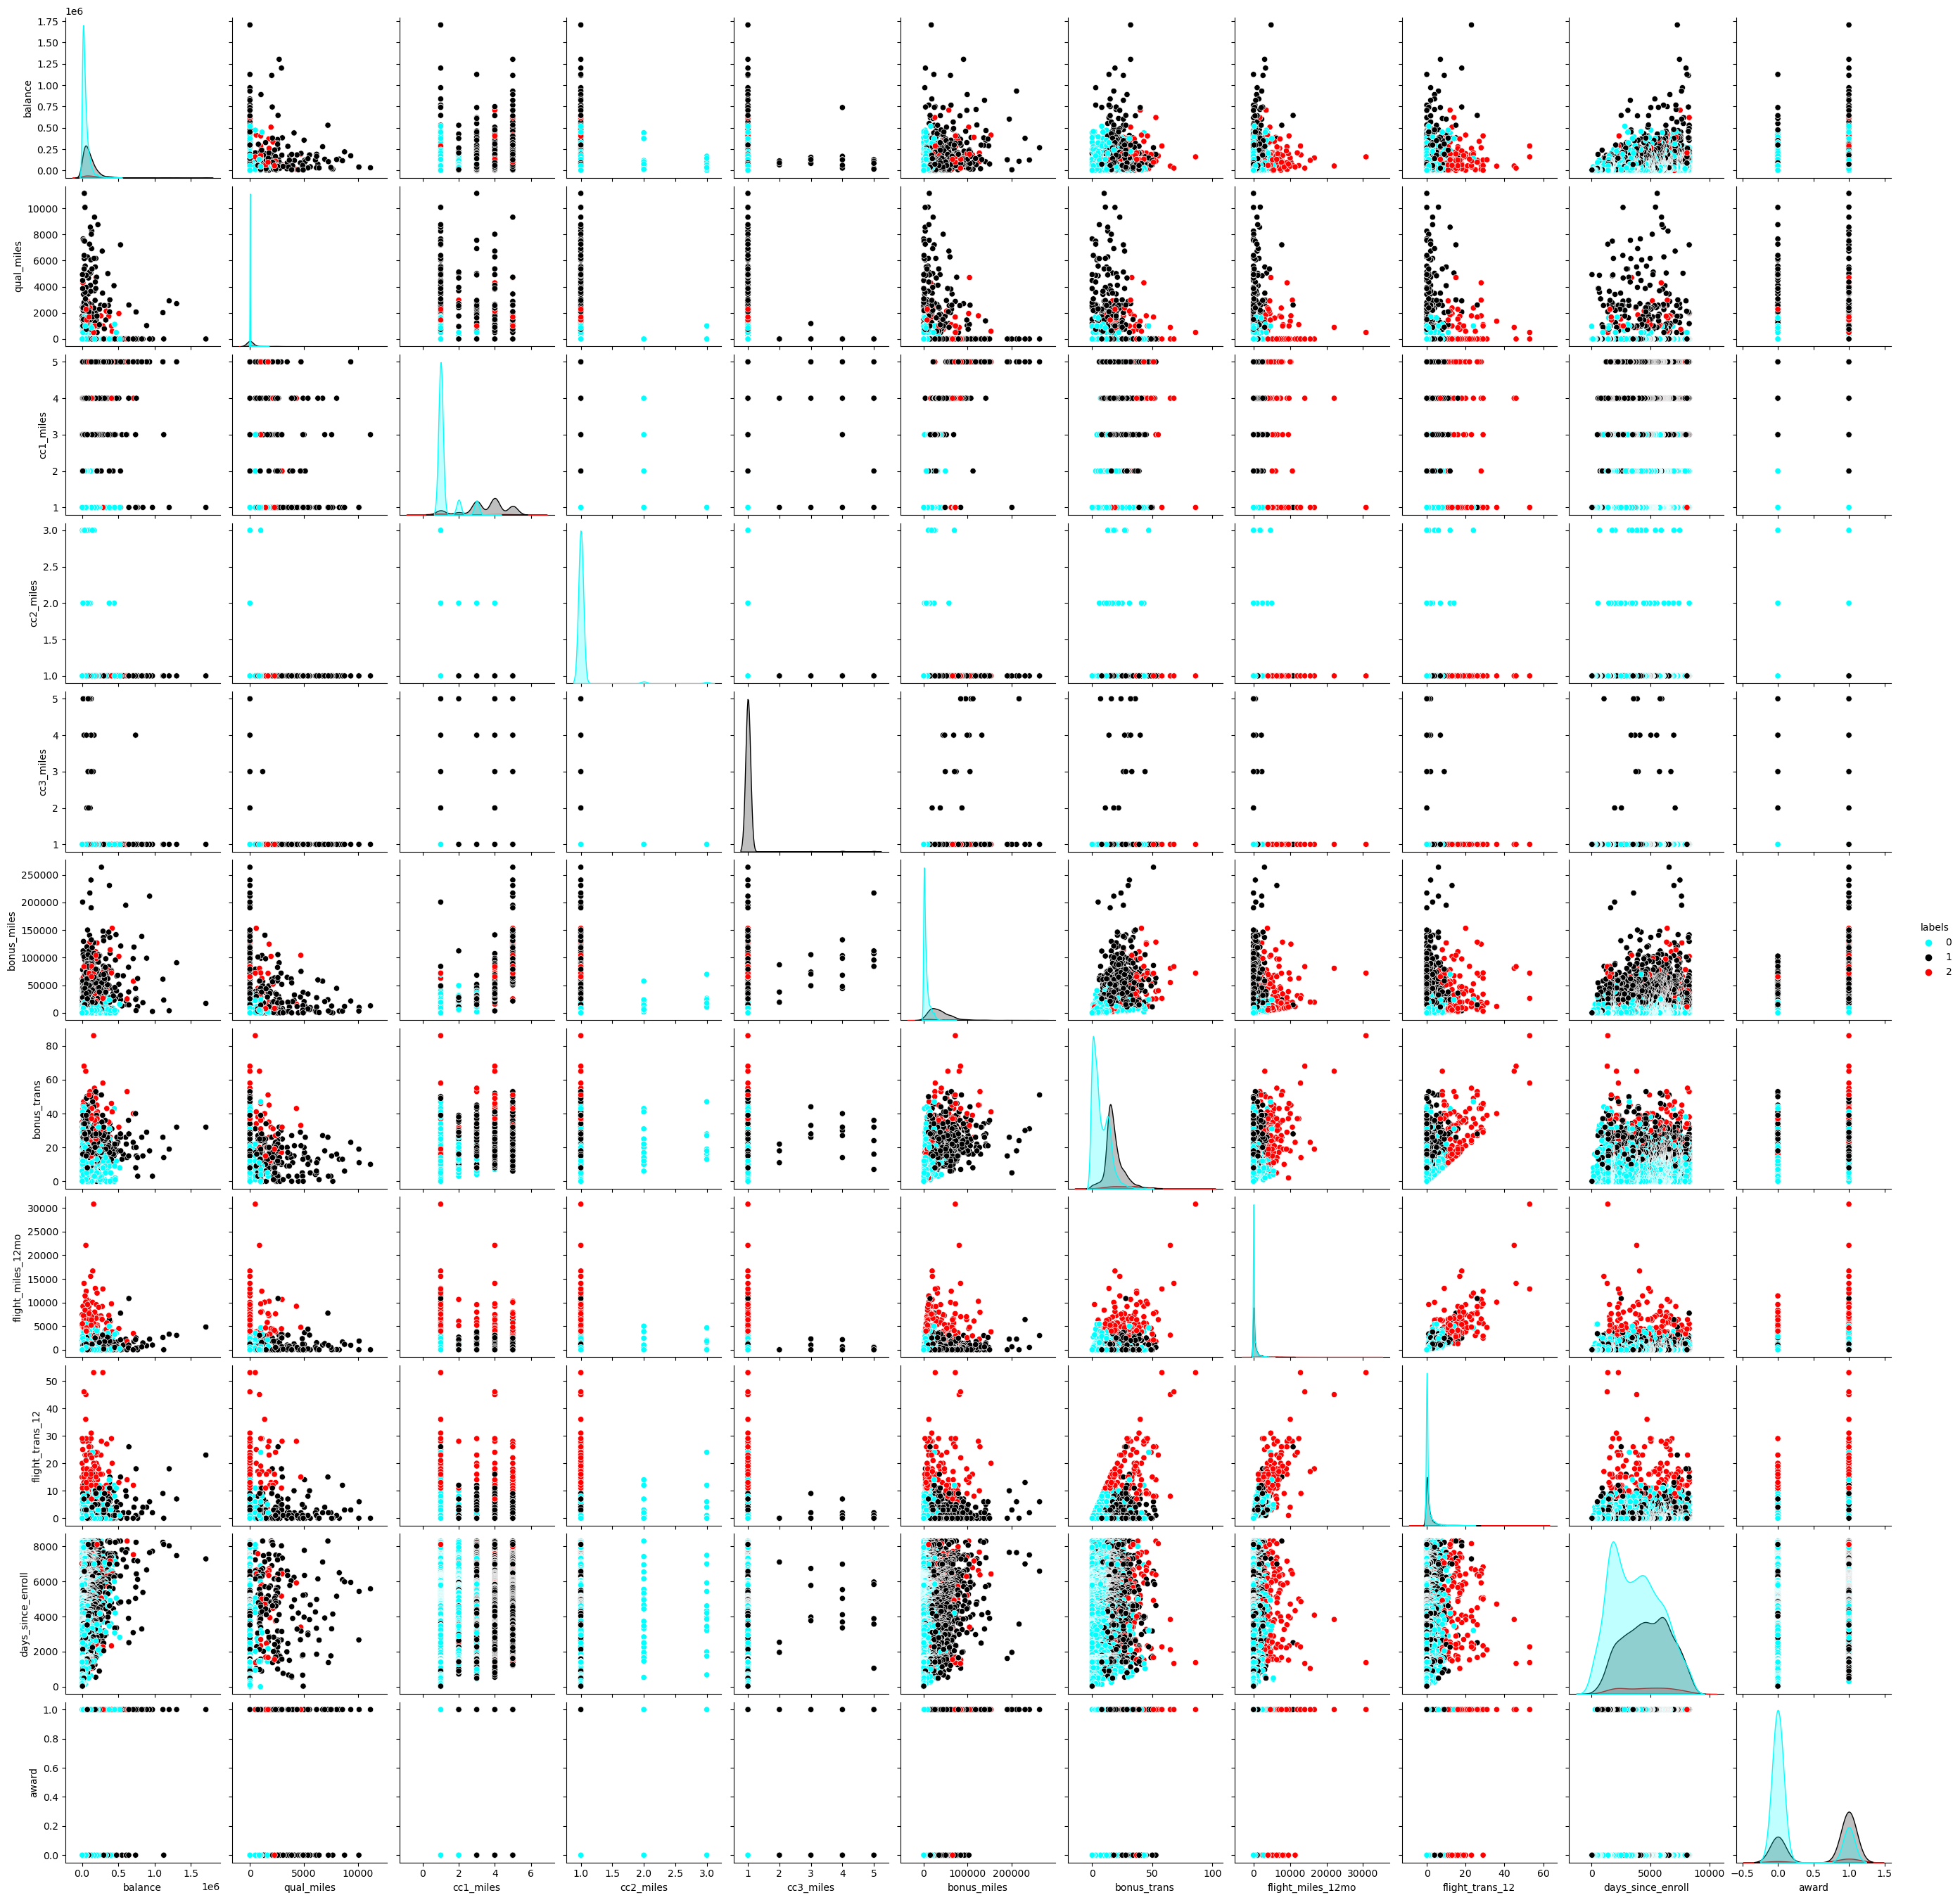

In [71]:
#Visualization for Hierarchical clustering

colour = {1:'black' , 0:'cyan' , 2:'red'}

sns.pairplot(data_hc,hue = 'labels' , palette = colour)

C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

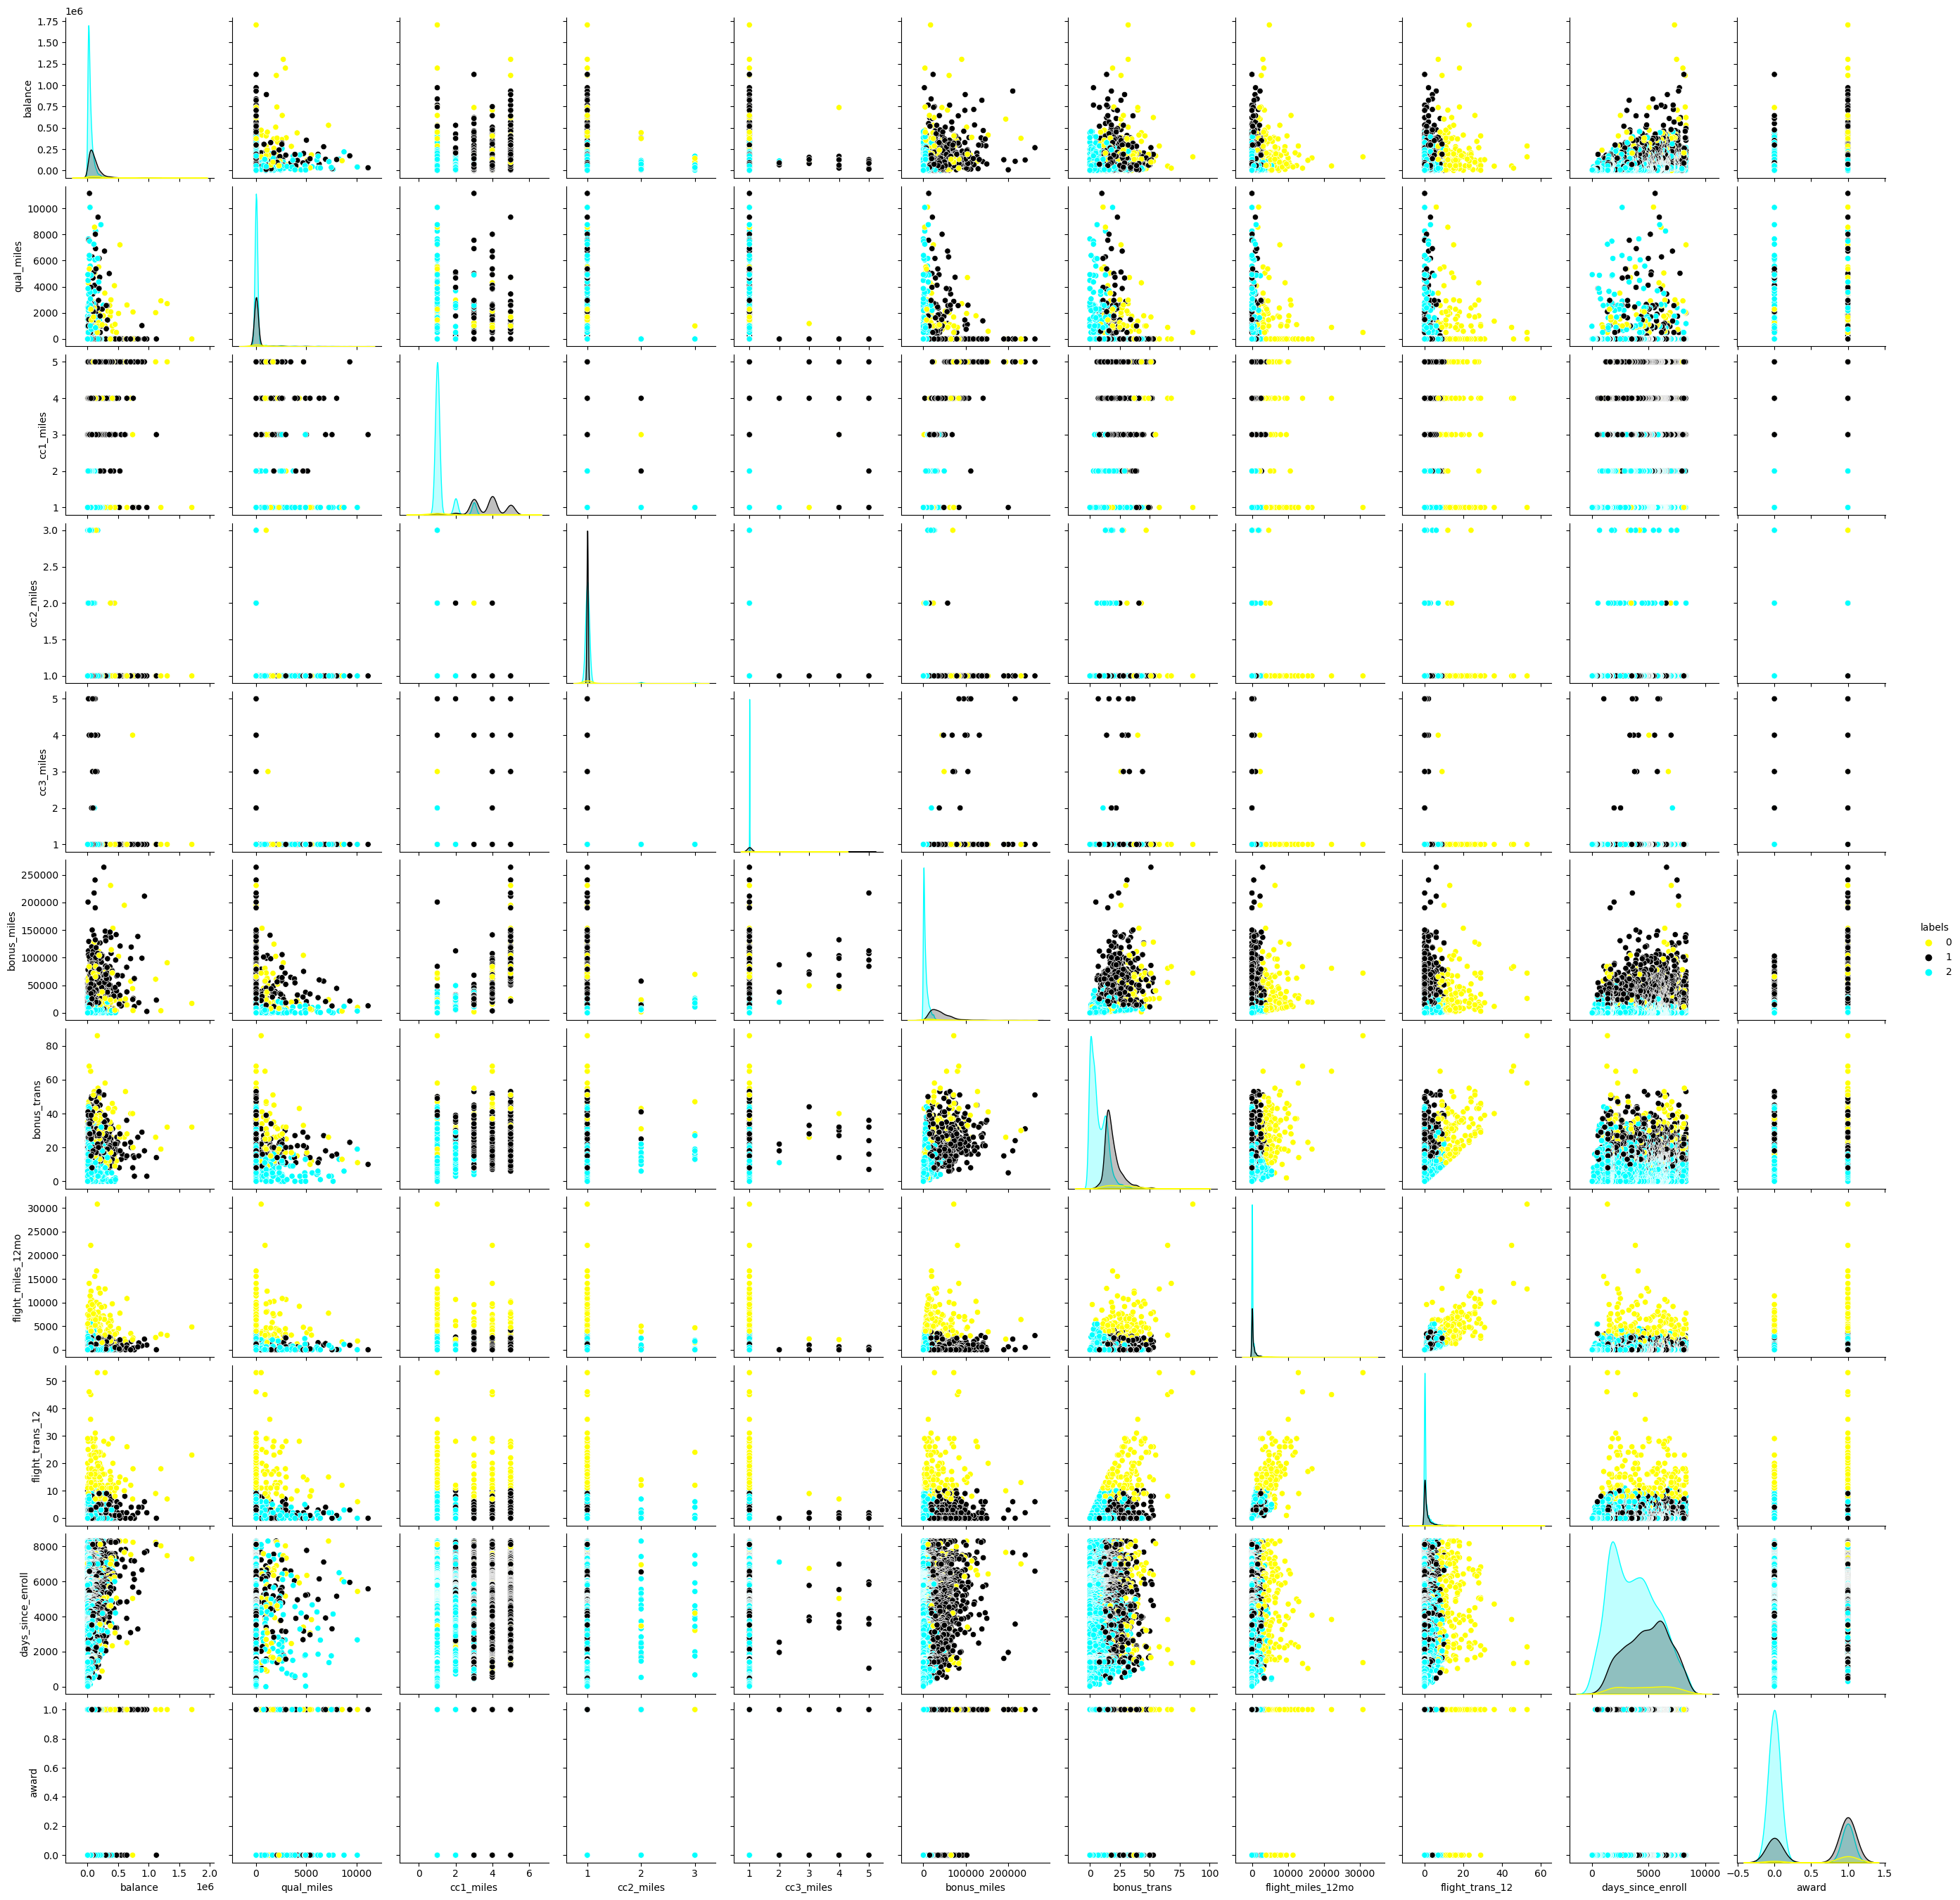

In [72]:
#Visualization for KMeans

color = {1:'black' , 0: 'yellow' , 2:'cyan'}

sns.pairplot(data_kmeans , hue ='labels' , palette=color)

C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

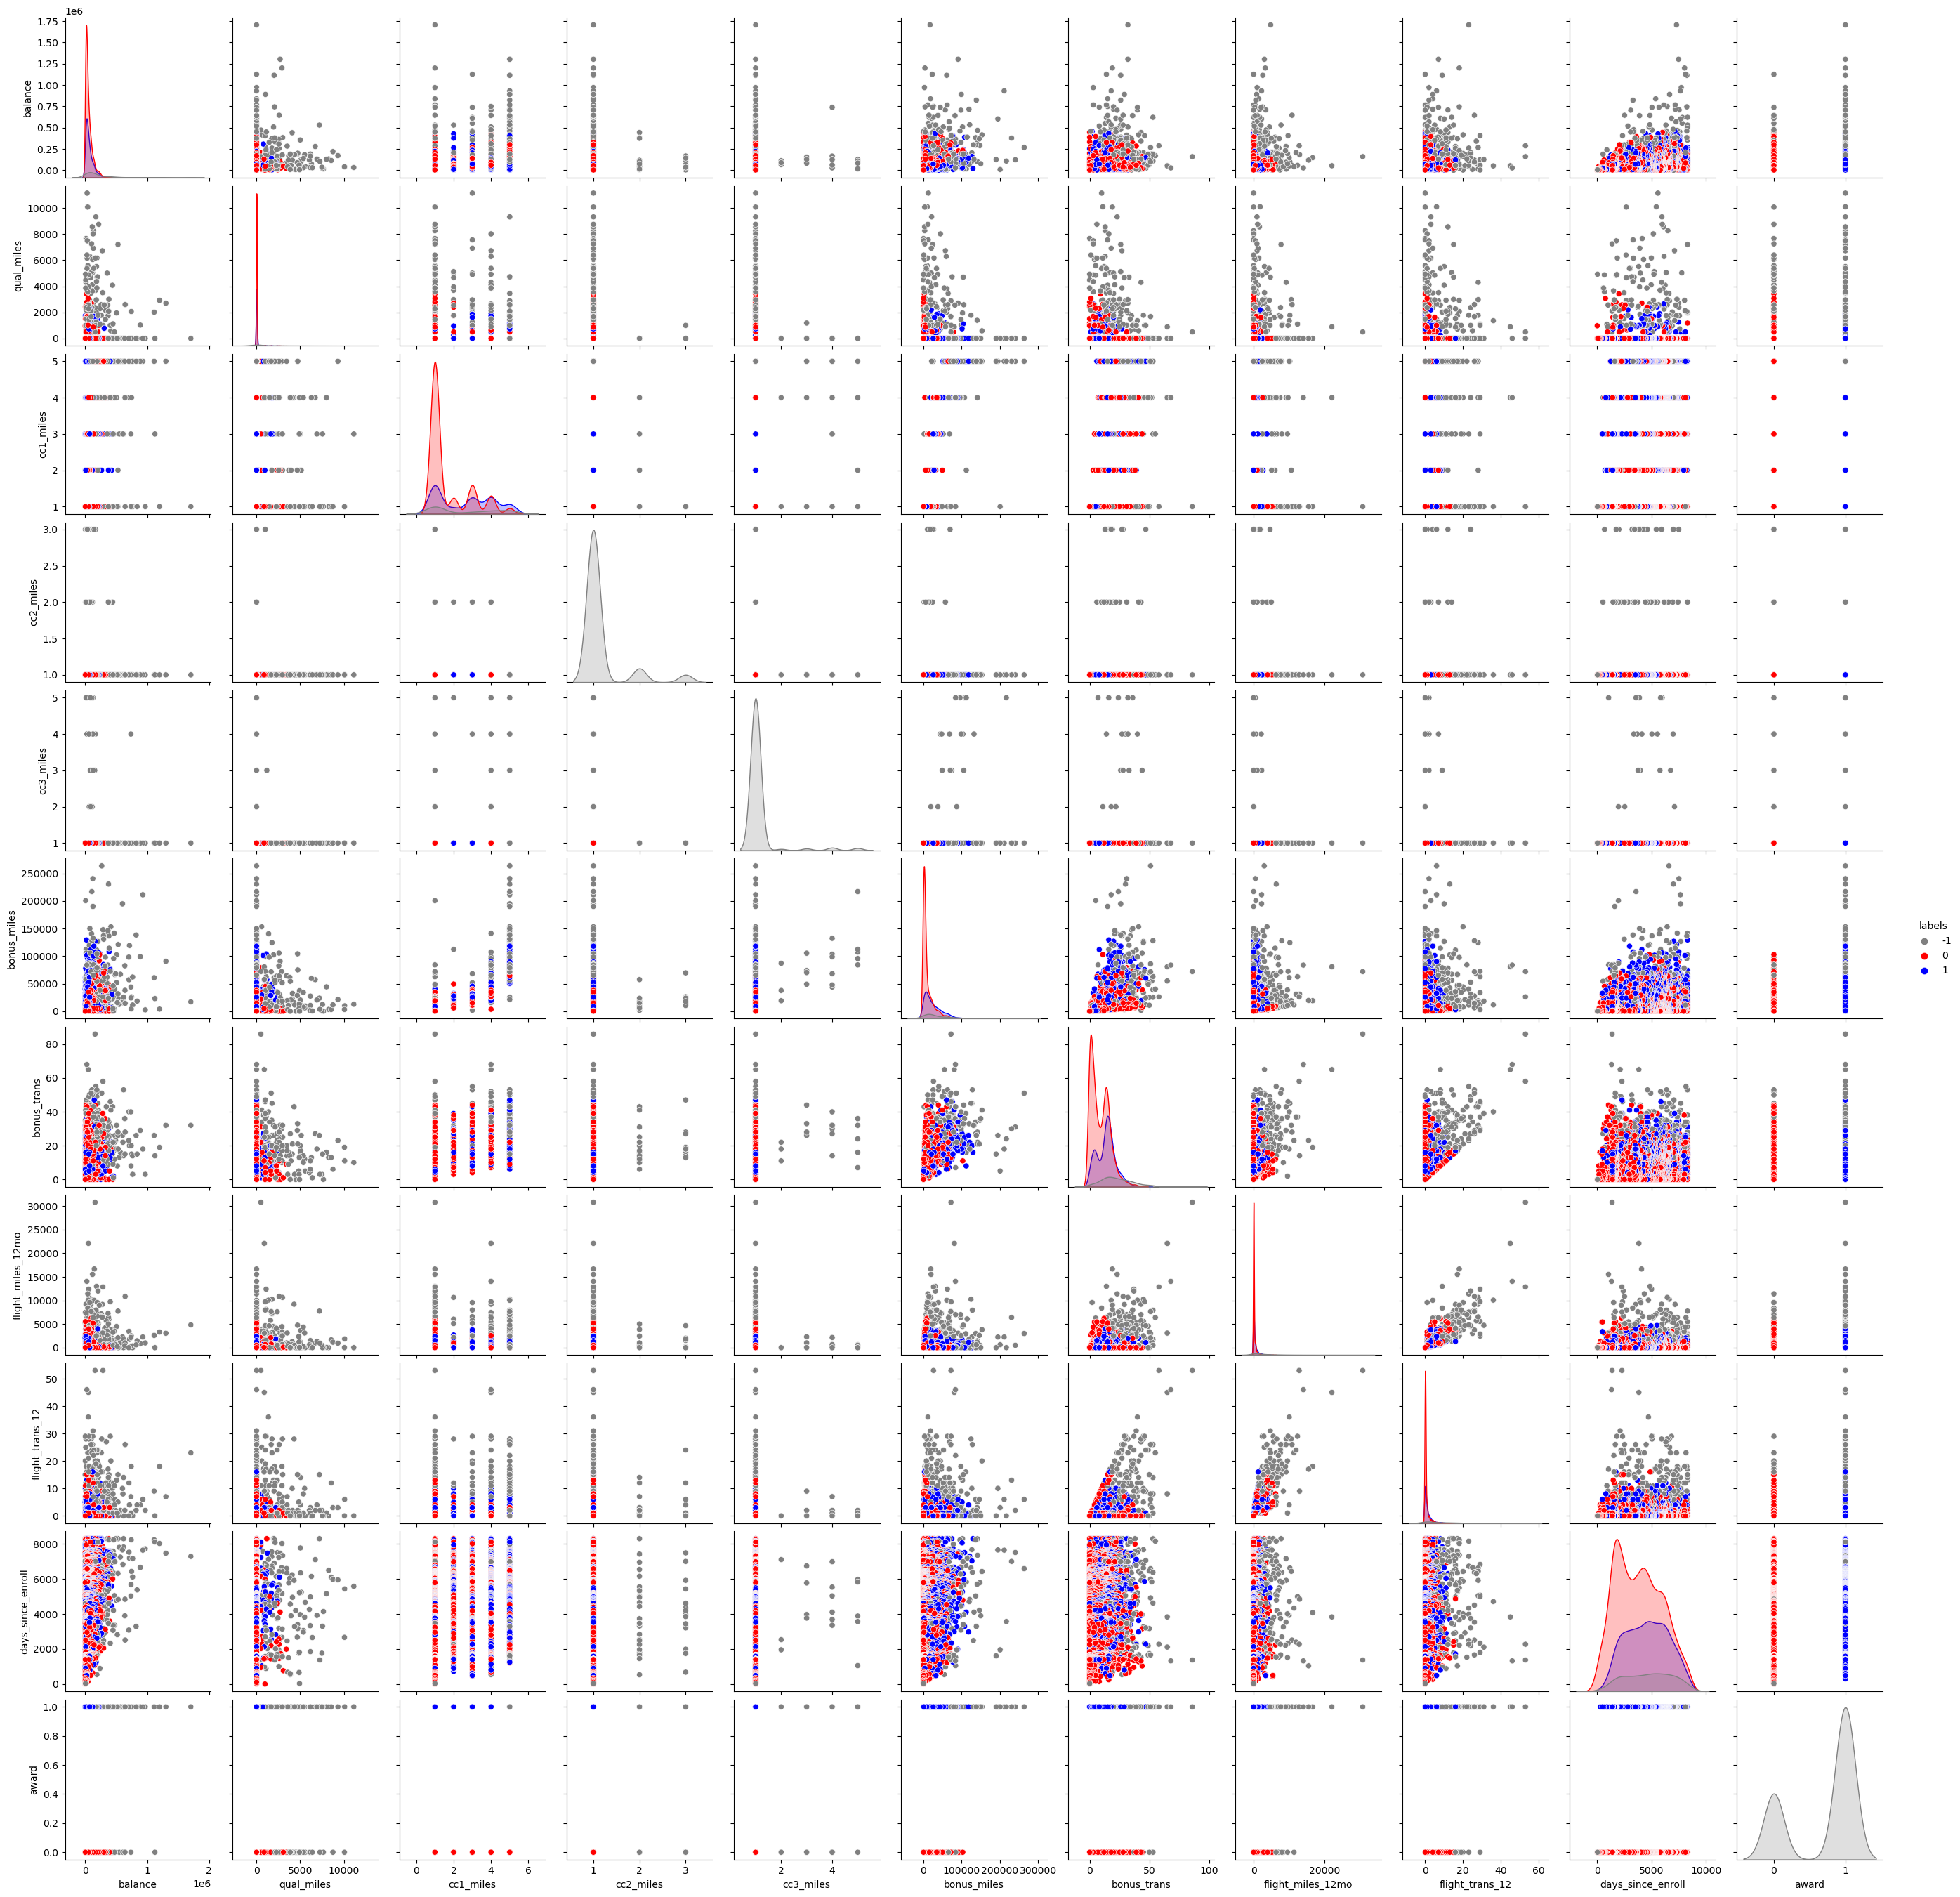

In [73]:
#For DBSCAN cluster visualisation

colors = {0:'red', 1:'blue', -1:'gray'}

sns.pairplot(data_dbscan , hue ='labels' , palette = colors)

# Evaluation and Performance Metrics:

In [74]:
# Hierarchical Clustering 
ss_hc=silhouette_score(std_data,labels_hc)
print("Silhouette Score For Hierarchical Clustering:",ss_hc)

Silhouette Score For Hierarchical Clustering: 0.2940432062008628


In [75]:
# Hierarchical Clustering 
ss_kmeans=silhouette_score(std_data,labels_kmeans)
print("Silhouette Score For KMeans Clustering:",ss_kmeans)

Silhouette Score For KMeans Clustering: 0.30930665971915194


In [76]:
# DBSCAN Clustering 
ss_dbscan=silhouette_score(std_data,labels_dbscan)
print("Silhouette Score For DBSCAN Clustering:",ss_dbscan)

Silhouette Score For DBSCAN Clustering: 0.24764349888350987


# Silhouette Score of Kmeans has Highest score

# TSNE

In [152]:
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

In [153]:
data_hc.head()

balance  qual_miles  cc1_miles  cc2_miles  cc3_miles  bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   bonus_trans  flight_miles_12mo  flight_trans_12  days_since_enroll  award  \
0            1                  0                0               7000      0   
1            2                  0                0               6968      0   
2            4                  0                0               7034      0   
3            1                  0                0               6952      0   
4           26               2077                4               6935      1   

   labels  
0       0  
1       0  
2       0  
3       0  
4       1

In [89]:
tsne_data=TSNE(n_components=2)
tsne_hc=tsne_data.fit_transform(data_hc.iloc[:,:-1])
tsne_hc

array([[-38.431595 , -29.082308 ],
       [-52.478046 , -10.298872 ],
       [ -2.1491225, -40.564793 ],
       ...,
       [ 25.504353 ,  -7.830032 ],
       [ 15.932858 , -38.867126 ],
       [-36.56942  ,  40.68129  ]], dtype=float32)

# visualization of Clusters

# Before Clustering 

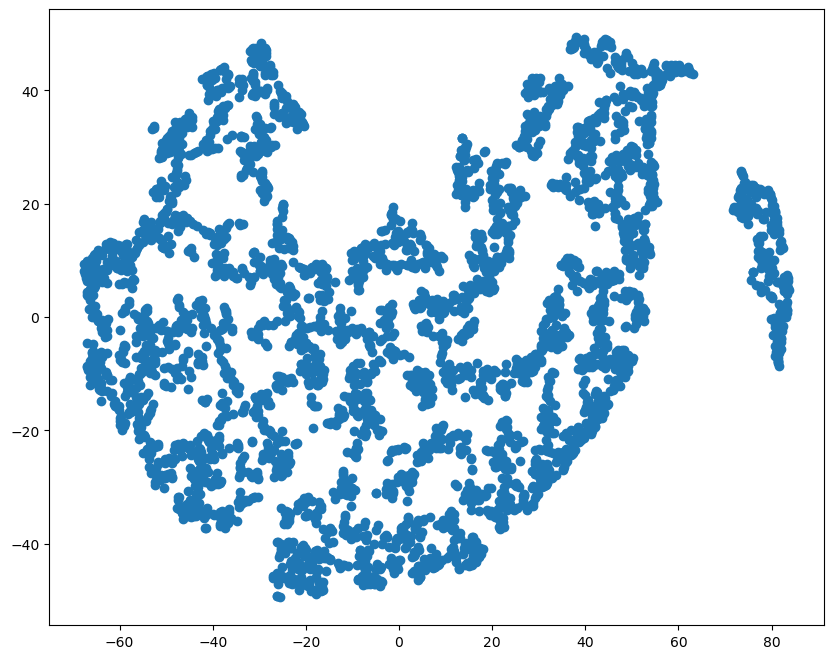

In [96]:
plt.figure(figsize=(10,8))
plt.scatter(tsne_hc[:,0],tsne_hc[:,1])

# Hierarchy Clustering Codes

In [154]:
colorclass=data_hc["labels"].to_numpy()
cluster.tsneplot(score=tsne_hc,colorlist=colorclass,legendpos="best",figname="tsne_hierarchy")

# Kmeans Clustering Codes

In [155]:
colorclass=data_kmeans["labels"].to_numpy()
cluster.tsneplot(score=tsne_kmeans,colorlist=colorclass,legendpos="best",figname="tsne_kmeans")

# DBSCAN Clustering Codes

In [156]:
colorclass=data_dbscan["labels"].to_numpy()
cluster.tsneplot(score=tsne_dbscan,colorlist=colorclass,legendpos="best",figname="tsne_dbscan")